In [1]:
# Import the libraries required
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas import Series, DataFrame

In [2]:
# import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
#Import packages for tests
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon, shapiro, levene, chi2_contingency, mannwhitneyu
from statsmodels.stats.power import ttest_power

## Q1. Exploratory Data Analysis on Wholesale Customers data

In [4]:
# Read Wholesale customer data
retailers = pd.read_csv("Wholesale Customers Data.csv", index_col="Buyer/Spender")
retailers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338
2,Retail,Other,7057,9810,9568,1762,3293,1776
3,Retail,Other,6353,8808,7684,2405,3516,7844
4,Hotel,Other,13265,1196,4221,6404,507,1788
5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
retailers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 440
Data columns (total 8 columns):
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


In [6]:
# Description of the data
retailers.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### 1.1. Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [7]:
# Group the data as per the spends in each Region and Channel
g_customers = retailers.groupby(["Region", "Channel"]).sum()

In [8]:
g_customers['Total Spend'] = 0
for idx in range(0, len(g_customers)):
    g_customers.iloc[idx,-1] = g_customers.iloc[idx, :].sum()
    

g_customers

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  Total Spend  
Region Channel                             
Lisbon Hotel           70632      1538342  
       Retail          33695       848471  
Oporto Hotel           30965       719150  
       Retail          23541       835938  
Other  Hotel          320358      5742077  
       Retail         191752      4935522

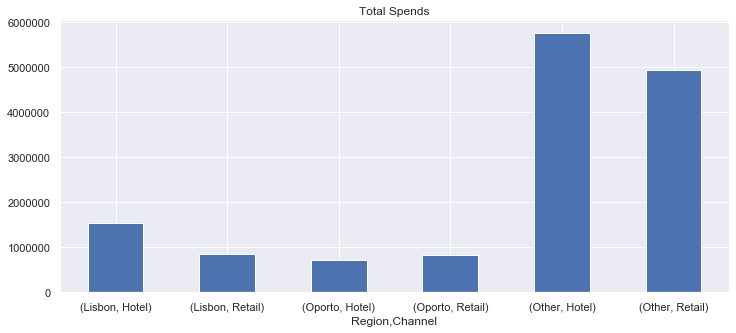

In [9]:
g_customers["Total Spend"].plot(kind="bar", figsize=(12, 5), title="Total Spends")
plt.xticks(rotation=0)
plt.show()

In [10]:
# Which region and channel to spend max?
max_spend = g_customers[g_customers['Total Spend'] == g_customers["Total Spend"].max()]
print("The region {} and channel {} spends max = {}".format(max_spend.index[0][0], max_spend.index[0][1], max_spend["Total Spend"][0]))

The region Other and channel Hotel spends max = 5742077


In [11]:
# Which region and channel to spend min?
min_spend = g_customers[g_customers['Total Spend'] == g_customers["Total Spend"].min()]
print("The region {} and channel {} spends min = {}".format(min_spend.index[0][0], min_spend.index[0][1], min_spend["Total Spend"][0]))

The region Oporto and channel Hotel spends min = 719150


#### 1.2. There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [12]:
g_customers_std = retailers.groupby(["Region", "Channel"]).std()
g_customers_std

Fresh          Milk       Grocery        Frozen  \
Region Channel                                                           
Lisbon Hotel    12342.008901   4298.321195   3629.644143   3276.460124   
       Retail    5415.521495   6609.221463  10414.687844   2424.774577   
Oporto Hotel     8969.362752   2968.628697   3048.298815  11454.478518   
       Retail    6867.934548   6611.354136  14035.453775   2473.266471   
Other  Hotel    14746.572913   4508.505269   3593.506056   4956.590848   
       Retail    9635.394129  10574.827178  12298.935356   1504.498737   

                Detergents_Paper  Delicatessen  
Region Channel                                  
Lisbon Hotel         1305.907616   1219.945304  
       Retail        5515.878798   1626.486667  
Oporto Hotel          425.310506   1056.778800  
       Retail        8286.748255   1065.438042  
Other  Hotel         1099.970640   3663.183304  
       Retail        6022.091110   2119.052222

In [13]:
g_customers_med = retailers.groupby(["Region", "Channel"]).median()

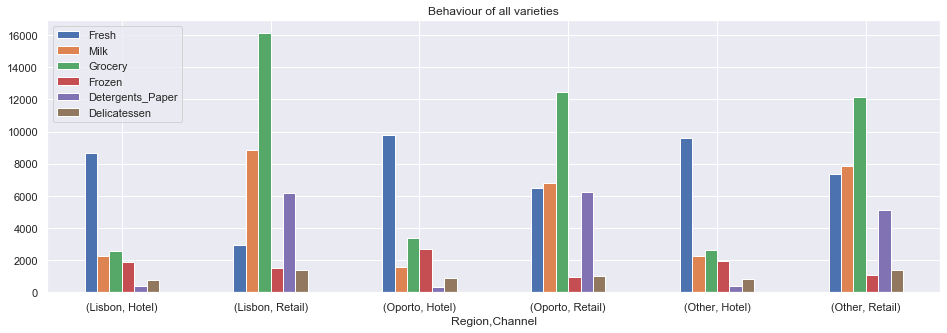

In [14]:
g_customers_med.plot(kind="bar", figsize=(16, 5), title="Behaviour of all varieties")
plt.xticks(rotation=0)
plt.show()

#### From the above it is pretty clear that all the varieties doesnot show a similar behaviour across the region and channel. The varieties show a significant difference across the regions and channel.

#### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [15]:
retailers_var = retailers.std().sort_values(ascending=True)
retailers_var

Delicatessen         2820.105937
Detergents_Paper     4767.854448
Frozen               4854.673333
Milk                 7380.377175
Grocery              9503.162829
Fresh               12647.328865
dtype: float64

In [16]:
print("Most inconsistent behaviour is", retailers_var.tail(1))
print("Least inconsistent behaviour is", retailers_var.head(1))

Most inconsistent behaviour is Fresh    12647.328865
dtype: float64
Least inconsistent behaviour is Delicatessen    2820.105937
dtype: float64


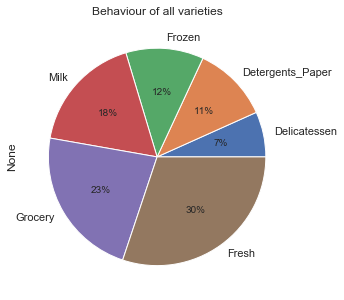

In [17]:
retailers_var.plot(kind='pie', autopct='%1.0f%%', figsize=(5, 5), title="Behaviour of all varieties");

#### 1.4. Are there any outliers in the data?

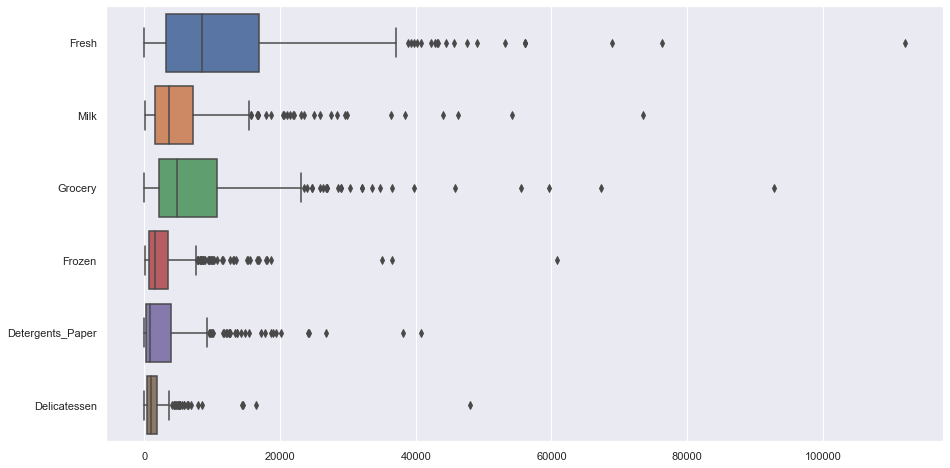

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=retailers, orient="h")
plt.show()

#### All the variety of items have outliers in the data.

#### 1.5. On the basis of this report, what are the recommendations?

## Q2: Tests of probabilities on undergraduate students.

In [19]:
survey = pd.read_csv("Survey.csv", index_col="ID")
survey.head()

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [20]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 13 columns):
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 6.8+ KB


In [21]:
survey.describe()

,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

##### 2.1.1. Gender and Major

In [22]:
gen_major_survey = pd.crosstab(index=survey["Gender"], columns=survey["Major"])
gen_major_survey

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


##### 2.1.2. Gender and Grad Intention

In [23]:
gen_grad_survey = pd.crosstab(index=survey["Gender"], columns=survey["Grad Intention"])
gen_grad_survey

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


##### 2.1.3. Gender and Employment

In [24]:
gen_emp_survey = pd.crosstab(index=survey["Gender"], columns=survey["Employment"])
gen_emp_survey

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


##### 2.1.4. Gender and Computer

In [25]:
gen_comp_survey = pd.crosstab(index=survey["Gender"], columns=survey["Computer"])
gen_comp_survey

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

##### 2.2.1. What is the probability that a randomly selected CMSU student will be male? What is the probability that a randomly selected CMSU student will be female?

In [26]:
gen_counts = survey["Gender"].value_counts()

In [27]:
print("Probability of randomly selected student will be male is", (gen_counts['Male']/gen_counts.sum()))

Probability of randomly selected student will be male is 0.46774193548387094


In [28]:
print("Probability of randomly selected student will be female is", (gen_counts['Female']/gen_counts.sum()))

Probability of randomly selected student will be female is 0.532258064516129


##### 2.2.2. Find the conditional probability of different majors among the male students in CMSU. Find the conditional probability of different majors among the female students of CMSU.

In [29]:
probability = lambda values : (values/values.sum())

In [30]:
gen_major_survey.aggregate(probability, axis=1)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448


##### 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male. Find the conditional probability of intent to graduate, given that the student is a female.

In [31]:
gen_grad_survey.aggregate(probability, axis=1)

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.272727,0.393939,0.333333
Male,0.103448,0.310345,0.586207


##### 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [32]:
gen_emp_survey.aggregate(probability, axis=1)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,0.090909,0.727273,0.181818
Male,0.241379,0.655172,0.103448


##### 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students. 

In [33]:
gen_comp_survey.aggregate(probability, axis=1)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.060606,0.878788,0.060606
Male,0.103448,0.896552,0.000000


#### 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case

In [34]:
chi2_contingency(gen_major_survey)

(7.084844866036089,
 0.42009968345511806,
 7,
 array([[3.72580645, 2.12903226, 5.85483871, 3.19354839, 5.32258065,
         3.72580645, 7.4516129 , 1.59677419],
        [3.27419355, 1.87096774, 5.14516129, 2.80645161, 4.67741935,
         3.27419355, 6.5483871 , 1.40322581]]))

In [35]:
chi2_contingency(gen_grad_survey)

(4.774796781066374,
 0.09186837889149435,
 2,
 array([[ 6.38709677, 11.70967742, 14.90322581],
        [ 5.61290323, 10.29032258, 13.09677419]]))

In [36]:
chi2_contingency(gen_emp_survey)

(2.9355495613715337,
 0.2304376894892966,
 2,
 array([[ 5.32258065, 22.88709677,  4.79032258],
        [ 4.67741935, 20.11290323,  4.20967742]]))

In [37]:
chi2_contingency(gen_comp_survey)

(2.114372565783224,
 0.3474320117040881,
 2,
 array([[ 2.66129032, 29.27419355,  1.06451613],
        [ 2.33870968, 25.72580645,  0.93548387]]))

##### Based on the above probabilities the column variables in each case is independent of Gender.

###  Part II

#### 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric] 

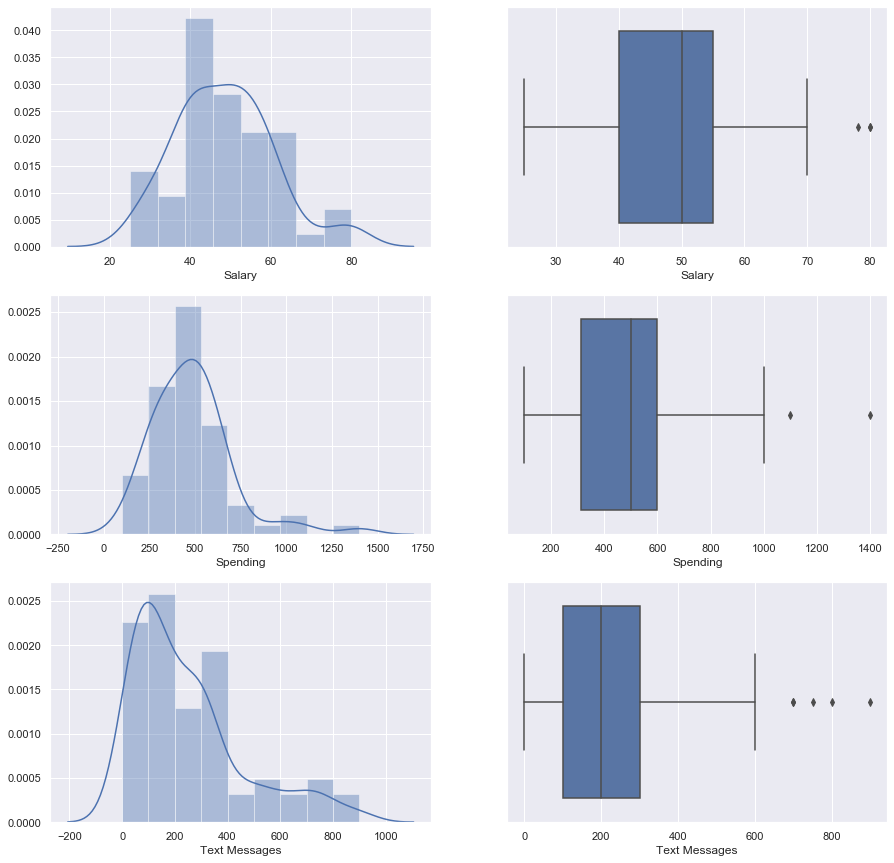

In [38]:
fig, axes = plt.subplots(3,2, figsize=(15, 15))
sns.distplot(survey['Salary'], ax=axes[0][0])
sns.distplot(survey['Spending'], ax=axes[1][0])
sns.distplot(survey['Text Messages'], ax=axes[2][0])
sns.boxplot(x="Salary", data=survey, ax=axes[0][1])
sns.boxplot(x="Spending", data=survey, ax=axes[1][1])
sns.boxplot(x="Text Messages", data=survey, ax=axes[2][1])
plt.show()

In [39]:
# We use shapiro test for validating normality
def test_shapiro(data):
    print("Shapiro test result on", data.name)
    t_statistic, p_value = shapiro(data)
    if p_value < 0.05:
        print("P Value is {}, Therefore at 5% significance level, we can conclude that the data does not follow normal distribution.".format(p_value))
        return False
    else:
        print("P Value is {}, Therefore at 5% significance level, we can conclude that the data follows normal distribution.".format(p_value))
        return True

In [40]:
survey[["Salary", "Spending", "Text Messages"]].apply(test_shapiro)

Shapiro test result on Salary
P Value is 0.028000956401228905, Therefore at 5% significance level, we can conclude that the data does not follow normal distribution.
Shapiro test result on Spending
P Value is 1.6854661225806922e-05, Therefore at 5% significance level, we can conclude that the data does not follow normal distribution.
Shapiro test result on Text Messages
P Value is 4.324040673964191e-06, Therefore at 5% significance level, we can conclude that the data does not follow normal distribution.


Salary           False
Spending         False
Text Messages    False
dtype: bool

## Q3: Inferential analysis on asphalt shingles.

In [41]:
shingles = pd.read_csv("A & B shingles.csv")
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [42]:
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [43]:
shingles.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [44]:
shingles['B'].fillna(round(shingles['B'].mean(),2), inplace=True)

#### 3.1. Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

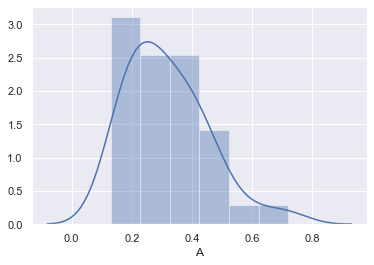

In [45]:
sns.distplot(shingles['A']);

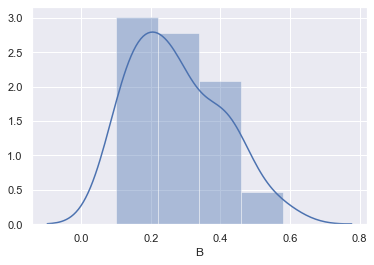

In [46]:
sns.distplot(shingles['B']);

In [47]:
shapiro(shingles['A'])

(0.9375598430633545, 0.042670514434576035)

In [48]:
shapiro(shingles['B'])

(0.940085768699646, 0.05111302435398102)

In [49]:
levene(shingles['A'], shingles['B'])

LeveneResult(statistic=0.02563140406834268, pvalue=0.8732648862934214)

In [50]:
mannwhitneyu(shingles['A'], shingles['B'])

MannwhitneyuResult(statistic=528.5, pvalue=0.0899339961335952)

In [51]:
effect_size = (np.mean(shingles['A']) - np.mean(shingles['B'])) / (np.sqrt(((36-1)*np.var(shingles['A'])+(36-1)*np.var(shingles['B'])) / (36+36-2)))

In [52]:
ttest_power(effect_size, nobs=36, alpha=0.05)

0.5011194926268715

#### 3.2.	What assumption about the population distribution is needed in order to conduct the hypothesis tests above?